In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr,pearsonr, stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import eli5

In [27]:
feature_path = "../SoR_Alberta.Shared.Data.and.Codebook.xlsx"#"../data/gr3/gr3_features.xlsx"
score_name = "G3.Gates.RC.raw"

show_graph = False
feature_names = ['G3.PPVT.Vocab.raw',
                 'G3.Elision.PA.raw',
                 'G3.Syn.GramCorrect.raw',
                 'G3.TOWRE.SWE.raw',
                 'G3.TOWRE.PDE.raw',
                 'G3.WordID.raw',
                 'G3.OL.Spell.Total',
                 'G3.OL.OrthoChoice.1.2.Total',
                 'G3.DigitSpan.raw',
                 'G3.Gates.RC.raw',
                 'G4.Gates.RC.raw',
                 'G5.Gates.RC.raw']

df = pd.read_excel(feature_path)


for col in feature_names:
    test_var = []
    score = []
    for i in df.index:
        if df[col][i] >= 0:
            test_var.append(df[col][i])
            score.append(df['G3.Gates.RC.raw'][i])
    
    print(col)
    print('Mean:', np.mean(test_var))
    print('Median:', np.median(test_var))
    print('Mode:', stats.mode(test_var)[0])
    print('Standard Deviation:', np.std(test_var))
    print('Variance:',np.var(test_var),'\n')
    print("Spearman's correlation", spearmanr(test_var, score)[0])
    print("Peterson's correlation", pearsonr(test_var, score)[0])
    
    if show_graph:
        # Graph histogram
        n, bins, patches = plt.hist(x=test_var, bins='auto', color='#0504aa',
                                alpha=0.7, rwidth=0.85)
        plt.grid(axis='y', alpha=0.75)
        plt.xlabel('Score')
        plt.ylabel('Frequency')
        plt.title(col)
        maxfreq = n.max()
        # Set a clean upper y-axis limit.
        plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
        plt.show()

        normalized = stats.zscore(test_var)
        n, bins, patches = plt.hist(x=normalized, bins='auto', color='#0504aa',
                                alpha=0.7, rwidth=0.85)
        plt.grid(axis='y', alpha=0.75)
        plt.xlabel('Score')
        plt.ylabel('Frequency')
        plt.title(col)
        maxfreq = n.max()
        # Set a clean upper y-axis limit.
        plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
        plt.show()
        print("-"*80)

G3.PPVT.Vocab.raw
Mean: 31.8705035971223
Median: 32.0
Mode: [33]
Standard Deviation: 4.9817429736732155
Variance: 24.817763055742454 

Spearman's correlation 0.4037221735829947
Peterson's correlation 0.41202237293021426
G3.Elision.PA.raw
Mean: 22.949640287769785
Median: 25.0
Mode: [26]
Standard Deviation: 6.101448985832974
Variance: 37.22767972672222 

Spearman's correlation 0.46828359536373737
Peterson's correlation 0.4390721662991758
G3.Syn.GramCorrect.raw
Mean: 9.565217391304348
Median: 10.0
Mode: [10]
Standard Deviation: 3.254776916906591
Variance: 10.593572778827976 

Spearman's correlation 0.6194247017421407
Peterson's correlation 0.6209022540675055
G3.TOWRE.SWE.raw
Mean: 56.64748201438849
Median: 59.0
Mode: [62]
Standard Deviation: 14.794935605099099
Variance: 218.89011955902905 

Spearman's correlation 0.7118902786600517
Peterson's correlation 0.6826267866489794
G3.TOWRE.PDE.raw
Mean: 24.294964028776977
Median: 24.0
Mode: [18]
Standard Deviation: 12.878208261256253
Variance: 16

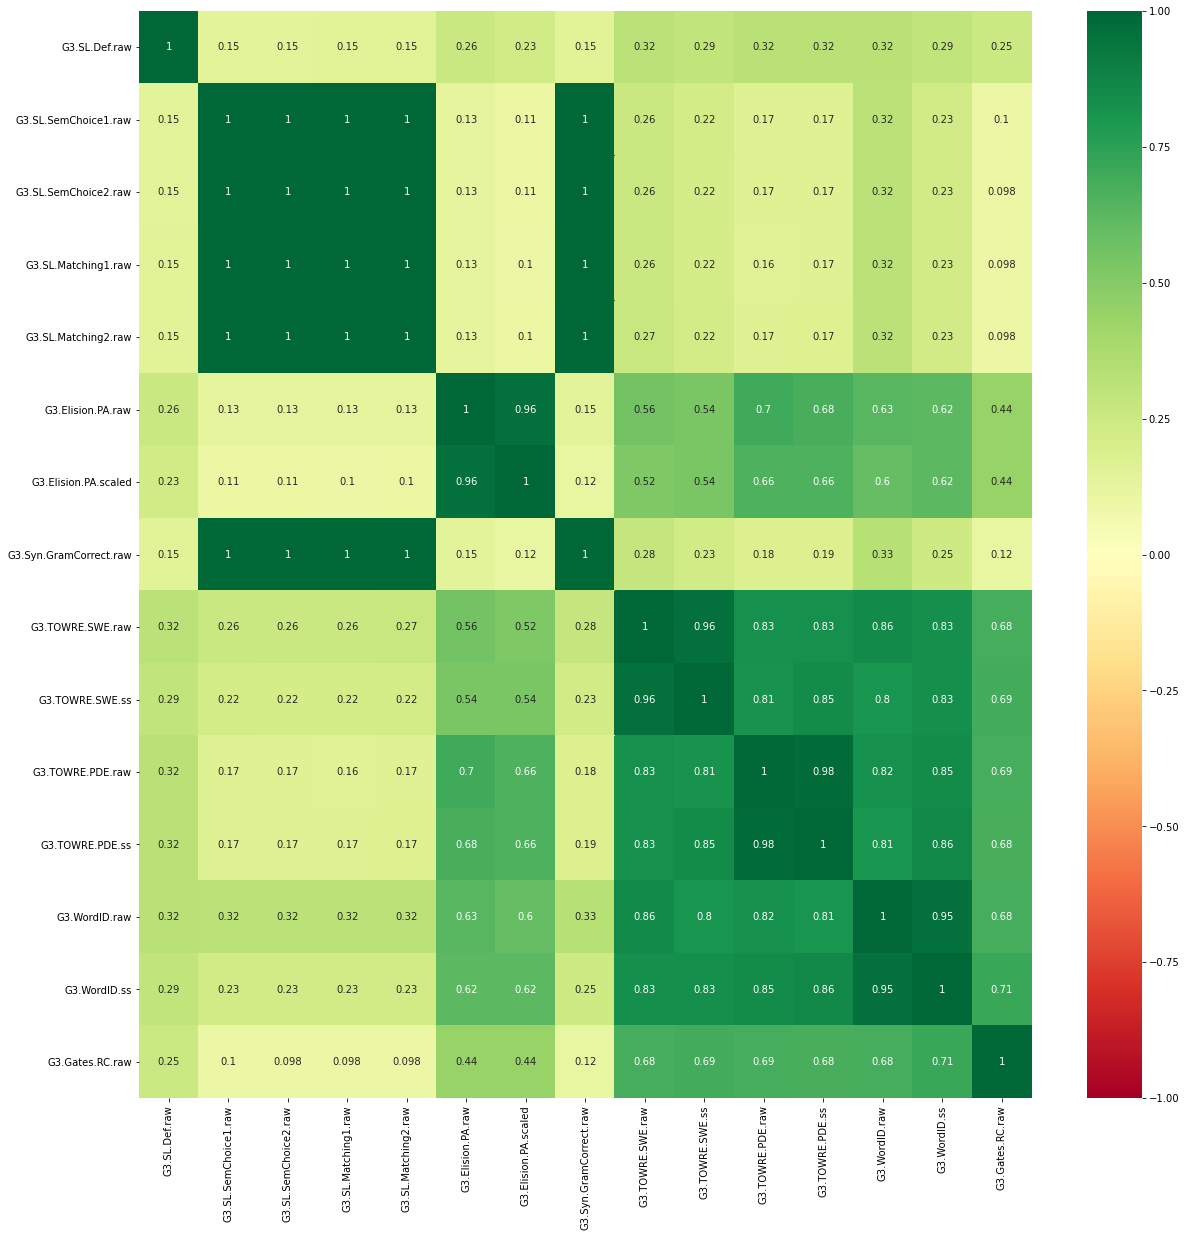

In [25]:

import seaborn as sns
# data = pd.read_csv("D://Blogs//train.csv")
X = df.iloc[:,4:19]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn",vmin=-1, vmax=1)

## Linear regression

In [4]:
from eli5 import show_prediction
def lin_regress(feature_names,target_name):
    X = []
    y = []
    for i in df.index:
        unavailable = False
        for col in feature_names:
            if df[col][i] < 0:
                unavailable = True
                break

        if unavailable:
            continue
        new_entry = []
        for name in feature_names:
            new_entry.append(df[name][i])

        X.append(new_entry)
        y.append(df[target_name][i])

    X = np.asarray(X)
    y = np.asarray(y)
    print(X.shape)
    print(y.shape)
    
    X = preprocessing.normalize(X, norm='max',axis=0)
    
    reg = LinearRegression().fit(X, y)
    print('R squared score:', reg.score(X,y))

#     print('betas:')
#     for i, name in enumerate(feature_names):
#         print(f"{name : <30}\t| {reg.coef_[i]}")
        
#     eli5.show_weights(reg, feature_names=feature_names)
#     print(eli5.format_as_text(eli5.explain_weights(reg)))
        
#     show_prediction(reg, X[1], feature_names = list(feature_names)) 
        
    plt.barh(feature_names,np.abs(reg.coef_))
    plt.show()



### G3 skill -> G3 score

(136, 9)
(136,)
R squared score: 0.6108535121020096


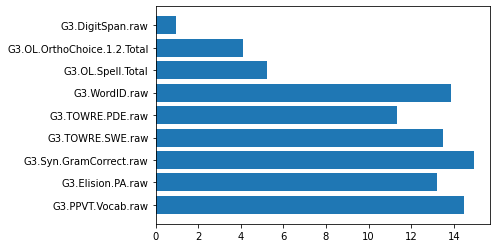

In [5]:
feature_names = ['G3.PPVT.Vocab.raw',
                 'G3.Elision.PA.raw',
                 'G3.Syn.GramCorrect.raw',
                 'G3.TOWRE.SWE.raw',
                 'G3.TOWRE.PDE.raw',
                 'G3.WordID.raw',
                 'G3.OL.Spell.Total',
                 'G3.OL.OrthoChoice.1.2.Total',
                 'G3.DigitSpan.raw',
                ]
target_name = 'G3.Gates.RC.raw'

lin_regress(feature_names,target_name)


### G3 skill, score -> G4 score

(121, 13)
(121,)
R squared score: 0.6885897465286017


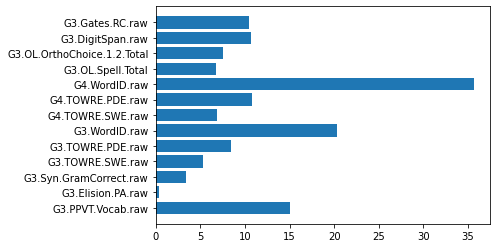

In [6]:
feature_names = ['G3.PPVT.Vocab.raw',
                 'G3.Elision.PA.raw',
                 'G3.Syn.GramCorrect.raw',
                 'G3.TOWRE.SWE.raw',
                 'G3.TOWRE.PDE.raw',
                 'G3.WordID.raw',
                 'G4.TOWRE.SWE.raw',
                 'G4.TOWRE.PDE.raw',
                 'G4.WordID.raw',
                 'G3.OL.Spell.Total',
                 'G3.OL.OrthoChoice.1.2.Total',
                 'G3.DigitSpan.raw',
                 'G3.Gates.RC.raw'
                ]

# feature_names = [
#                  'G3.PPVT.Vocab.raw',
#                  'G3.DigitSpan.raw',
#                  'G4.WordID.raw',
#                  'G3.Gates.RC.raw'
#                  ]

target_name = 'G4.Gates.RC.raw'

lin_regress(feature_names,target_name)

### G3 skill, score, G4 skill -> G4 score

(124, 6)
(124,)
R squared score: 0.6586357578208255


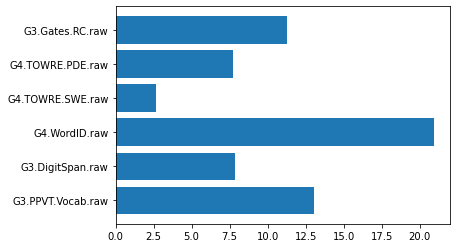

In [7]:
# feature_names = ['G3.PPVT.Vocab.raw',
#                  'G3.Elision.PA.raw',
#                  'G3.Syn.GramCorrect.raw',
#                  'G4.TOWRE.SWE.raw',
#                  'G4.TOWRE.PDE.raw',
#                  'G4.WordID.raw',
#                  'G3.OL.Spell.Total',
#                  'G3.OL.OrthoChoice.1.2.Total',
#                  'G3.DigitSpan.raw',
#                  'G3.Gates.RC.raw']
feature_names = [
                 'G3.PPVT.Vocab.raw',
                 'G3.DigitSpan.raw',
                 'G4.WordID.raw',
                 'G4.TOWRE.SWE.raw',
                 'G4.TOWRE.PDE.raw',
                 'G3.Gates.RC.raw'
                 ]
target_name = 'G4.Gates.RC.raw'

lin_regress(feature_names,target_name)


(106, 14)
(106,)
R squared score: 0.7237874799644737


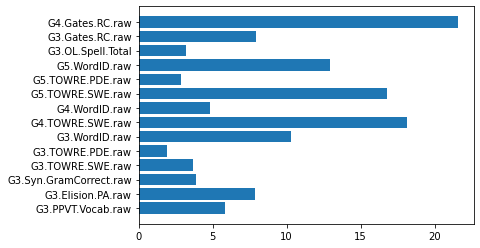

In [8]:
feature_names = ['G3.PPVT.Vocab.raw',
                 'G3.Elision.PA.raw',
                 'G3.Syn.GramCorrect.raw',
                 'G3.TOWRE.SWE.raw',
                 'G3.TOWRE.PDE.raw',
                 'G3.WordID.raw',
                 'G4.TOWRE.SWE.raw',
                 #'G4.TOWRE.PDE.raw',
                 'G4.WordID.raw',
                 'G5.TOWRE.SWE.raw',
                 'G5.TOWRE.PDE.raw',
                 'G5.WordID.raw',
                 'G3.OL.Spell.Total',
                 #'G3.OL.OrthoChoice.1.2.Total',
                 #'G3.DigitSpan.raw',
                 'G3.Gates.RC.raw',
                 'G4.Gates.RC.raw']
target_name = 'G5.Gates.RC.raw'

lin_regress(feature_names,target_name)

### Neural Regression

In [9]:
from regression_net import Net
import torch

# Load trained model
model = Net().double()
model.load_state_dict(torch.load('./saved_weights_regression.pt'))
model.eval()

Net(
  (hid1): Linear(in_features=10, out_features=10, bias=True)
  (hid2): Linear(in_features=10, out_features=10, bias=True)
  (oupt): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

torch.Size([10])
G3.PPVT.Vocab.raw
0.547496464852081
G3.Elision.PA.raw
0.26420198604324696
G3.Syn.GramCorrect.raw
0.47193089538633615
G4.TOWRE.SWE.raw
0.5976150329726551
G4.TOWRE.PDE.raw
0.7687781240122789
G4.WordID.raw
0.6248186287503117
G3.OL.Spell.Total
0.20292324676141504
G3.OL.OrthoChoice.1.2.Total
0.313307905315785
G3.DigitSpan.raw
0.2572988013606192
G3.Gates.RC.raw
0.7671767528069822


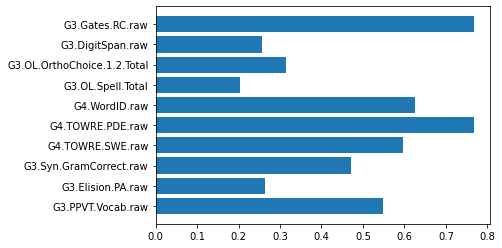

In [10]:
inp = np.ones(10)*0.5
inp = torch.tensor(inp).type(torch.double)
print(inp.shape)
with torch.no_grad():
    baseline = model(inp.double())

feature_names = ['G3.PPVT.Vocab.raw',
                 'G3.Elision.PA.raw',
                 'G3.Syn.GramCorrect.raw',
                 'G4.TOWRE.SWE.raw',
                 'G4.TOWRE.PDE.raw',
                 'G4.WordID.raw',
                 'G3.OL.Spell.Total',
                 'G3.OL.OrthoChoice.1.2.Total',
                 'G3.DigitSpan.raw',
                 'G3.Gates.RC.raw']
values = []

for i, name in enumerate(feature_names):
    print(name)
    inp[i] += 0.1
    with torch.no_grad():
        print(float(model(inp.double())-baseline))
        values.append(float(model(inp.double())-baseline))
    inp[i] -= 0.1
    
plt.barh(feature_names,np.abs(values))
plt.show()

### Decision Tree Regression

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [12]:
def dec_tree_regress(feature_names,target_name):
    X = []
    y = []
    for i in df.index:
        unavailable = False
        for col in feature_names:
            if df[col][i] < 0:
                unavailable = True
                break

        if unavailable:
            continue
        new_entry = []
        for name in feature_names:
            new_entry.append(df[name][i])

        X.append(new_entry)
        y.append(df[target_name][i])

    X = np.asarray(X)
    y = np.asarray(y)
    print(X.shape)
    print(y.shape)
    
    X = preprocessing.normalize(X, norm='max',axis=0)
    
    reg = DecisionTreeRegressor(random_state=0, max_depth=5)
    reg.fit(X, y)
    print('R squared score:', reg.score(X,y))
    print('Cross Validation score: ', cross_val_score(reg, X, y, cv=10))
        
    feat_importances = pd.Series(reg.feature_importances_, index=feature_names)
    feat_importances.nlargest(5).plot(kind='barh')
    plt.show()
#     show_prediction(reg, X[1], feature_names = list(feature_names))


In [13]:
def rand_forest_regress(feature_names,target_name):
    X = []
    y = []
    for i in df.index:
        unavailable = False
        for col in feature_names:
            if df[col][i] < 0:
                unavailable = True
                break

        if unavailable:
            continue
        new_entry = []
        for name in feature_names:
            new_entry.append(df[name][i])

        X.append(new_entry)
        y.append(df[target_name][i])

    X = np.asarray(X)
    y = np.asarray(y)
    print(X.shape)
    print(y.shape)
    
    X = preprocessing.normalize(X, norm='max',axis=0)
    
    reg = RandomForestRegressor(random_state=0, max_depth=5)
    reg.fit(X, y)
    print('R squared score:', reg.score(X,y))
    print('Cross Validation score: ', cross_val_score(reg, X, y, cv=10))
        
    feat_importances = pd.Series(reg.feature_importances_, index=feature_names)
    feat_importances.nlargest(5).plot(kind='barh',vmin =0, vmax =1)
    plt.show()
#     show_prediction(reg, X[1], feature_names = list(feature_names))


In [14]:
def extra_trees_regress(feature_names,target_name):
    X = []
    y = []
    for i in df.index:
        unavailable = False
        for col in feature_names:
            if df[col][i] < 0:
                unavailable = True
                break

        if unavailable:
            continue
        new_entry = []
        for name in feature_names:
            new_entry.append(df[name][i])

        X.append(new_entry)
        y.append(df[target_name][i])

    X = np.asarray(X)
    y = np.asarray(y)
    print(X.shape)
    print(y.shape)
    
    X = preprocessing.normalize(X, norm='max',axis=0)
    
    reg = ExtraTreesRegressor(random_state=0, max_depth=5)

    reg.fit(X, y)
    print('R squared score:', reg.score(X,y))
    print('Cross Validation score: ', cross_val_score(reg, X, y, cv=10))
        
    feat_importances = pd.Series(reg.feature_importances_, index=feature_names)
    feat_importances.nlargest(5).plot(kind='barh')
    plt.show()

(121, 9)
(121,)
R squared score: 0.8404221836671188
Cross Validation score:  [ 0.01254114  0.0917163  -0.76217582  0.29220188  0.35166894  0.2471856
  0.26732484  0.67702532 -0.19375762  0.35621043]


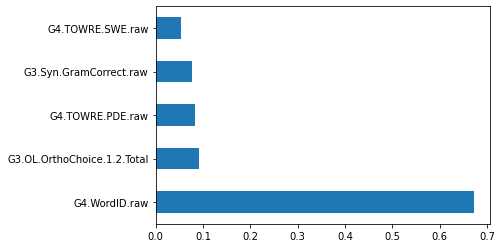

In [15]:
feature_names = ['G3.PPVT.Vocab.raw',
                 'G3.Elision.PA.raw',
                 'G3.Syn.GramCorrect.raw',
                 'G4.TOWRE.SWE.raw',
                 'G4.TOWRE.PDE.raw',
                 'G4.WordID.raw',
                 'G3.OL.Spell.Total',
                 'G3.OL.OrthoChoice.1.2.Total',
                 'G3.DigitSpan.raw',]
target_name = 'G4.Gates.RC.raw'

dec_tree_regress(feature_names,target_name)

(121, 10)
(121,)
R squared score: 0.874239552247104
Cross Validation score:  [ 0.38740876  0.32654564 -0.19590174  0.57193191  0.60172352  0.65669102
  0.66015138  0.50741336  0.38296796  0.56738437]


AttributeError: 'Rectangle' object has no property 'vmin'

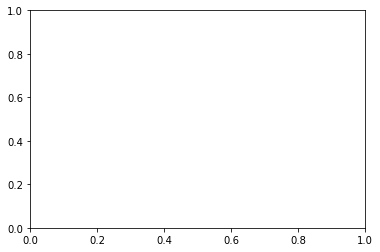

In [16]:
feature_names = ['G3.PPVT.Vocab.raw',
                 'G3.Elision.PA.raw',
                 'G3.Syn.GramCorrect.raw',
                 'G4.TOWRE.SWE.raw',
                 'G4.TOWRE.PDE.raw',
                 'G4.WordID.raw',
                 'G3.OL.Spell.Total',
                 'G3.OL.OrthoChoice.1.2.Total',
                 'G3.DigitSpan.raw',
                'G3.Gates.RC.raw']
target_name = 'G4.Gates.RC.raw'

rand_forest_regress(feature_names,target_name)

In [ ]:
feature_names = ['G3.PPVT.Vocab.raw',
                 'G3.Elision.PA.raw',
                 'G3.Syn.GramCorrect.raw',
                 'G4.TOWRE.SWE.raw',
                 'G4.TOWRE.PDE.raw',
                 'G4.WordID.raw',
                 'G3.OL.Spell.Total',
                 'G3.OL.OrthoChoice.1.2.Total',
                 'G3.DigitSpan.raw',
                 'G3.Gates.RC.raw'
                ]
target_name = 'G4.Gates.RC.raw'

extra_trees_regress(feature_names,target_name)

In [ ]:
feature_names = ['G3.PPVT.Vocab.raw',
                 'G3.Elision.PA.raw',
                 'G3.Syn.GramCorrect.raw',
                 'G4.TOWRE.SWE.raw',
                 'G4.TOWRE.PDE.raw',
                 'G4.WordID.raw',
                 'G3.OL.Spell.Total',
                 'G3.OL.OrthoChoice.1.2.Total',
                 'G3.DigitSpan.raw',
                 'G3.Gates.RC.raw']

# feature_names = [
#                  'G3.PPVT.Vocab.raw',
#                  'G3.DigitSpan.raw',
#                  'G4.WordID.raw',
#                  'G3.Gates.RC.raw'
#                  ]

target_name = 'G4.Gates.RC.raw'

dec_tree_regress(feature_names,target_name)

In [ ]:
feature_names = ['G3.PPVT.Vocab.raw',
                 'G3.Elision.PA.raw',
                 'G3.Syn.GramCorrect.raw',
                 'G5.TOWRE.SWE.raw',
                 'G5.TOWRE.PDE.raw',
                 'G5.WordID.raw',
                 'G3.OL.Spell.Total',
                 'G3.OL.OrthoChoice.1.2.Total',
                 'G3.DigitSpan.raw',
                 'G3.Gates.RC.raw']
target_name = 'G5.Gates.RC.raw'

dec_tree_regress(feature_names,target_name)